In [134]:
from joblib import load
import pandas as pd
import numpy as np
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt

plt.style.use('publication')

In [2]:
embedder = load("../../models/EmbeddingModel.pkl")

/home/kelvin/anaconda3/envs/rdkit/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/kelvin/anaconda3/envs/rdkit/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/kelvin/anaconda3/envs/rdkit/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
Traceback (most recent call last):
  File "/home/kelvin/anaconda3/envs/rdkit/lib/python3.6/site-packages/rdkit/Chem/PandasTools.py", line 130, in <module>
    if 'display.width' in pd.core.config._registered_options:
AttributeError: module 'pandas.core' has no attribute 'config'
/home/kelvin/anaconda3/e

In [120]:
tmc1_data = pd.read_pickle("../../data/processed/tmc1_ready.pkl")

# drop H2 from the predictions
# tmc1_data = tmc1_data.loc[tmc1_data["canonical"] != "[HH]"]

In [121]:
tmc1_data.reset_index(inplace=True, drop=True)

In [122]:
X = np.vstack([embedder.vectorize(smi) for smi in tmc1_data["canonical"].tolist()])

In [123]:
y = np.log10(tmc1_data["Column density (cm^-2)"]).values

In [124]:
model = BayesianRidge(tol=1e5, alpha_init=3., lambda_init=1e-5, fit_intercept=False)
result = model.fit(X, y)

In [125]:
pred_y, y_unc = model.predict(X, return_std=True)

In [160]:
gbr_model = load("../../models/gbr_grid.pkl").best_estimator_

/home/kelvin/anaconda3/envs/rdkit/lib/python3.6/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator GradientBoostingRegressor from version 0.24.1 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/kelvin/anaconda3/envs/rdkit/lib/python3.6/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator DummyRegressor from version 0.24.1 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/kelvin/anaconda3/envs/rdkit/lib/python3.6/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.24.1 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/kelvin/anaconda3/envs/rdkit/lib/python3.6/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator GridSearchCV from version 

In [161]:
gb_predictions = gbr_model.predict(X)

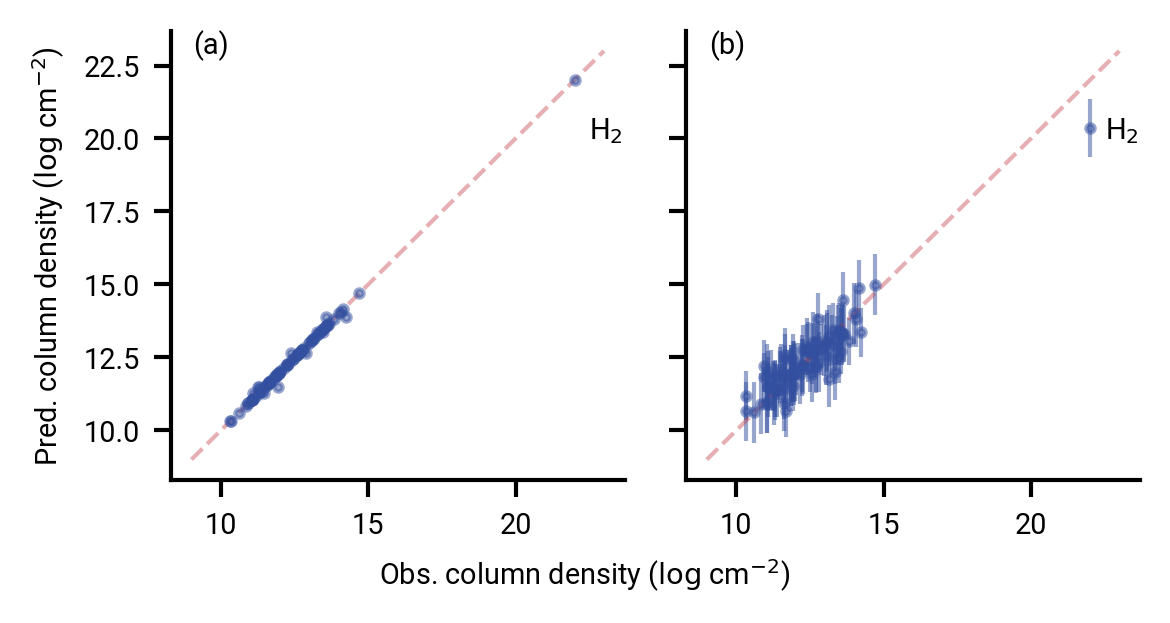

In [177]:
fig, axarray = plt.subplots(1, 2, figsize=(4,2.), sharex=True, sharey=True)

ax = axarray[0]
ax.errorbar(y, gb_predictions, fmt="o", alpha=0.5, markersize=2.)
ax.plot(np.arange(9., 24.), np.arange(9., 24.), ls="--", alpha=0.4)
ax.text(22.5, 20.3, "H$_2$", fontsize="x-small", verticalalignment="center")
ax.text(0.05, 0.95, "(a)", fontsize="x-small", transform=ax.transAxes)
ax.set(ylabel="Pred. column density ($\log$ cm$^{-2}$)")

ax = axarray[1]
ax.errorbar(y, pred_y, yerr=y_unc, fmt="o", alpha=0.5, markersize=2.)
ax.plot(np.arange(9., 24.), np.arange(9., 24.), ls="--", alpha=0.4)
ax.text(22.5, 20.3, "H$_2$", fontsize="x-small", verticalalignment="center")
ax.text(0.05, 0.95, "(b)", fontsize="x-small", transform=ax.transAxes)
fig.text(0.5, 0., "Obs. column density ($\log$ cm$^{-2}$)", ha="center", fontsize="x-small")
fig.savefig("../../reports/figures/bayes_ridge_h2.pdf", dpi=300)

In [127]:
r2_score(y, pred_y)

0.8554952319063911

In [83]:
h2_x = embedder.vectorize("[HH]")

In [119]:
model.predict(h2_x[None,:], return_std=True)

(array([13.21559023]), array([1.26927714]))

In [90]:
model.sigma_

array([[ 0.11144353, -0.20055723,  0.22870613, ...,  0.16308686,
         0.21531012, -0.12280126],
       [-0.20055723,  0.67931036, -0.25244595, ..., -0.1903895 ,
        -0.14293302, -0.09646348],
       [ 0.22870613, -0.25244595,  2.670932  , ...,  0.30332552,
         0.55541925, -1.96942693],
       ...,
       [ 0.16308686, -0.1903895 ,  0.30332552, ...,  4.10023416,
         0.33357253,  1.05155086],
       [ 0.21531012, -0.14293302,  0.55541925, ...,  0.33357253,
         5.78698515, -1.09713392],
       [-0.12280126, -0.09646348, -1.96942693, ...,  1.05155086,
        -1.09713392,  7.96462137]])

In [111]:
det_lr = load("../../models/svr_grid.pkl").best_estimator_

/home/kelvin/anaconda3/envs/rdkit/lib/python3.6/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator SVR from version 0.24.1 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/kelvin/anaconda3/envs/rdkit/lib/python3.6/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator GridSearchCV from version 0.24.1 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [112]:
det_lr.predict(h2_x[None,:])

array([13.88829592])

In [104]:
tmc1_data.sort_values("Column density (cm^-2)", ascending=False)

,Molecule,Formula,SMILES,Column density (cm^-2),DOI,Isotopologue,Upper Limit,Notes,canonical,vectors
5,Ammonia,NH3,N,5.010000e+14,10.3847/0067-0049/225/2/25,0,0,Kaifu survey obs,N,"[[-0.10662372, -0.04182613, -0.08487122, -0.24..."
35,Cyanoacetylene,HC3N,C#CC#N,1.750000e+14,10.3847/2041-8213/aba631,0,0,GOTHAM; analysis in Loomis 2020 but tabulated ...,C#CC#N,"[[-1.1536423, -0.134374, 0.27946454, 0.1209189..."
76,Methylidyne radical,CH,[CH],1.400000e+14,10.1021/jp3127913,0,0,Approximate value read from chart,[CH],"[[-0.0007529931, 0.00021367296, 0.0002616307, ..."
12,Methylacetylene,CH3CCH,CC#C,1.150000e+14,10.3847/0067-0049/225/2/31,0,0,Kaifu survey obs,C#CC,"[[-1.7179904, -0.41161215, 0.14113057, 0.41005..."
30,Dicarbon monosulfide,C2S,[C+]#C[S-],1.020000e+14,10.3847/0067-0049/225/2/50,0,0,Kaifu survey obs,[C+]#C[S-],"[[0.56015915, 0.16953567, 0.15095985, -0.82659..."
...,...,...,...,...,...,...,...,...,...,...
55,NaN,C4H-,C#CC#[C-],8.500000e+10,10.1086/520703,0,1,"GBT, Brunken 2007",[C-]#CC#C,"[[-0.25486314, 0.22086833, -0.18955407, -0.690..."
67,NaN,HCNO,C#N[O],7.000000e+10,10.1051/0004-6361/202039355,0,0,Yebes,C#NO,"[[0.32596815, -0.071275085, -0.64142, 0.565955..."
66,NaN,H2NCO+,NC#[O+],4.000000e+10,10.1051/0004-6361/202039354,0,1,Yebes,NC#[O+],"[[0.7206721, -0.30858618, 0.13813436, -0.23079..."
79,NaN,C6H2,C=C=C=C=C=[C],2.130000e+10,10.1086/310622,0,0,NASA DSN 70m; converted assuming H2 density,C=C=C=C=C=C,"[[0.972791, -0.8536632, -1.1786451, 1.4019799,..."
